# Installing and importing necessary libraries

In [1]:
#pip install keras

In [2]:
#pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Importing the Dataset

In [4]:
gas = pd.read_csv("D:\Study\Excelr DS\Assignments\AS-16-Neural-Networks\gas_turbines.csv")
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# Basic information of the dataset

In [5]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
gas.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


## Correlation Plot

<AxesSubplot:>

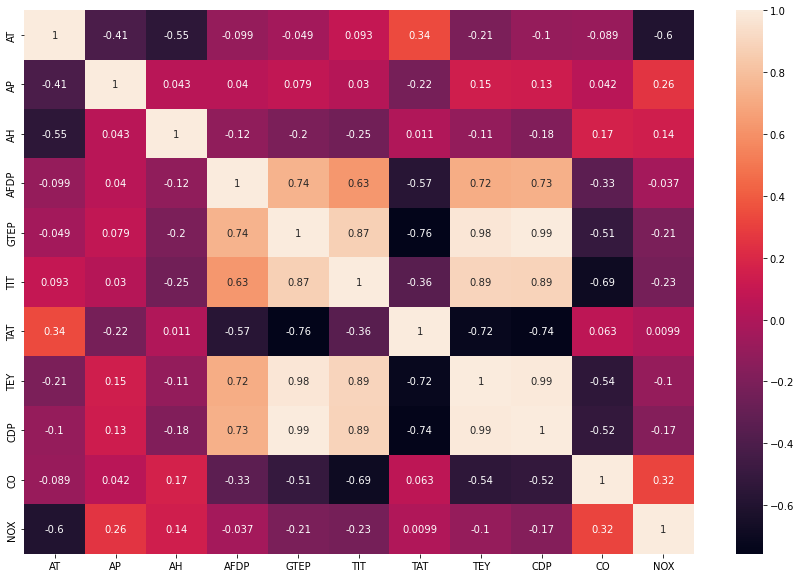

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(gas.corr(), annot=True)

## Plots showing individual relationship with 'TEY'

Indiviadual Comparison 




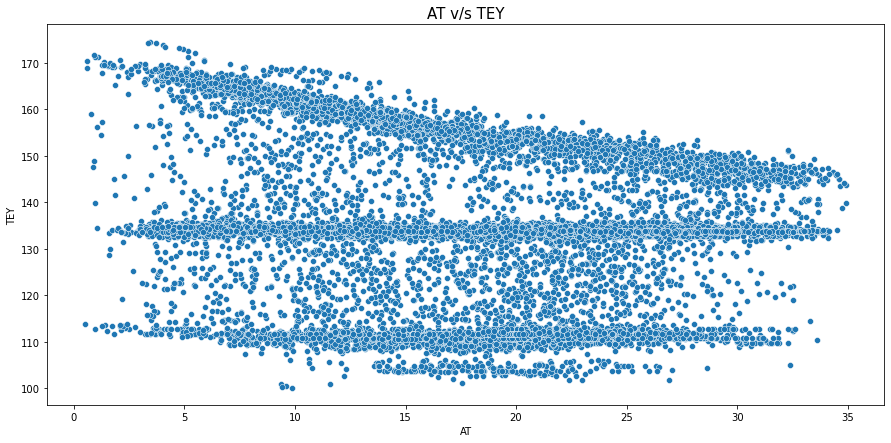

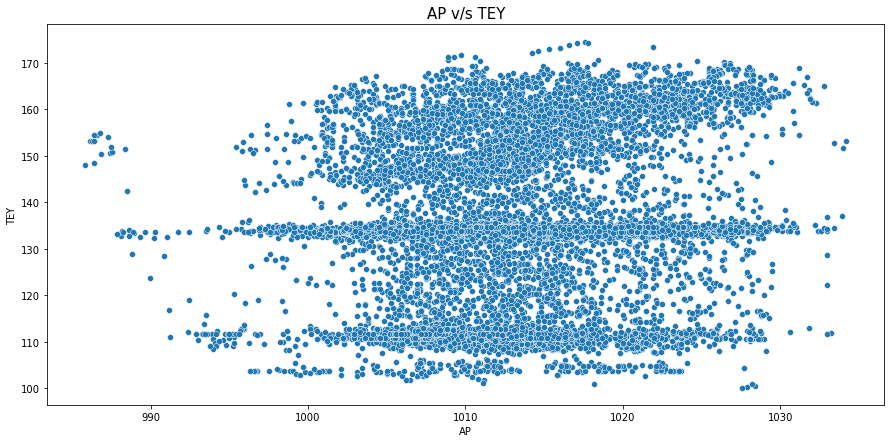

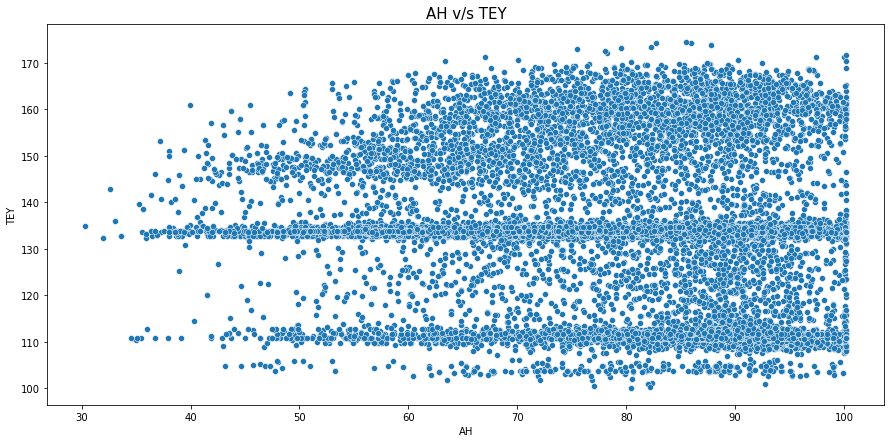

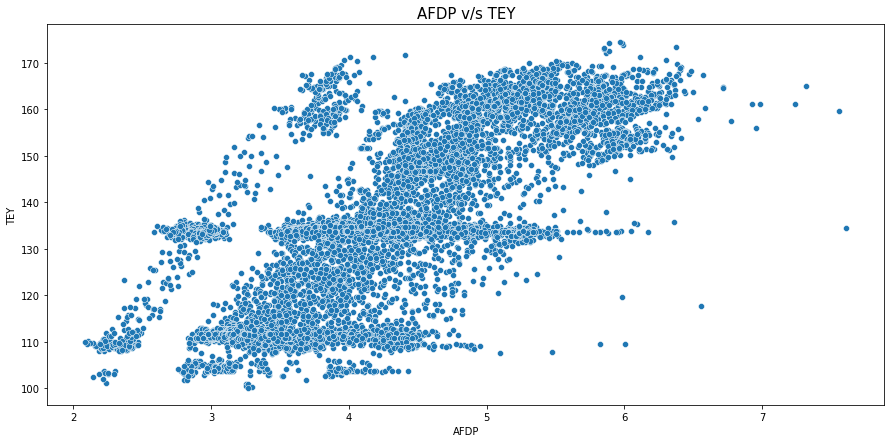

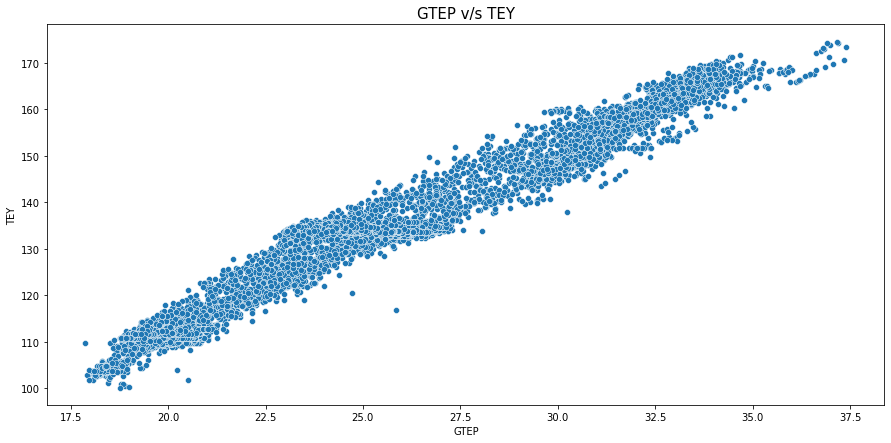

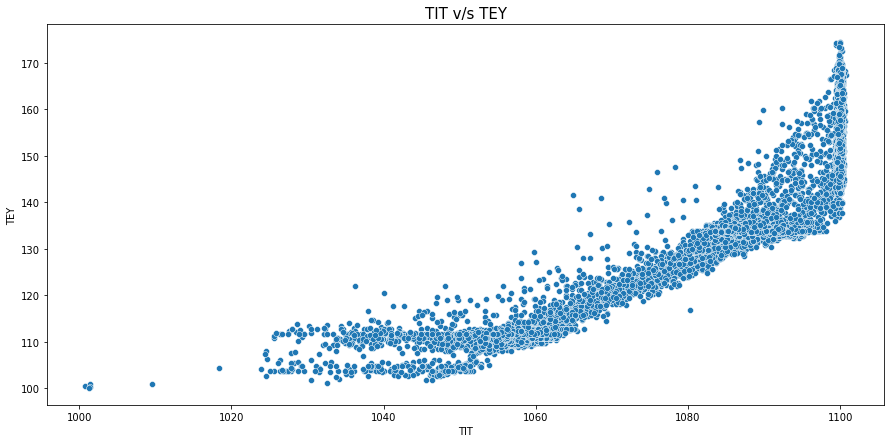

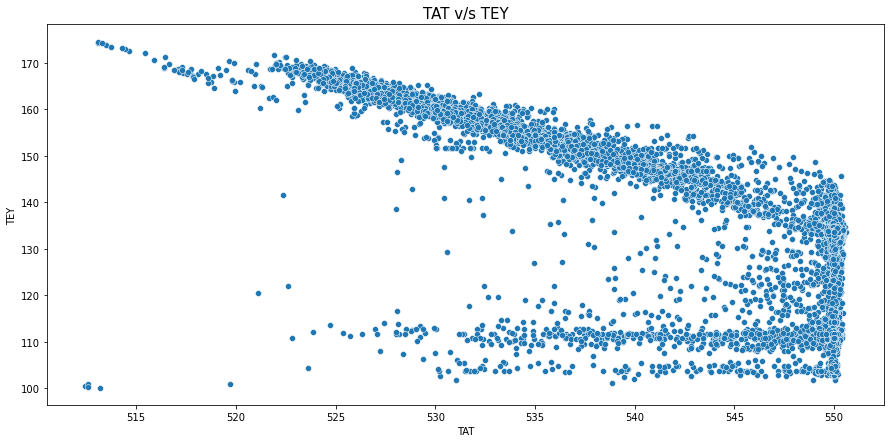

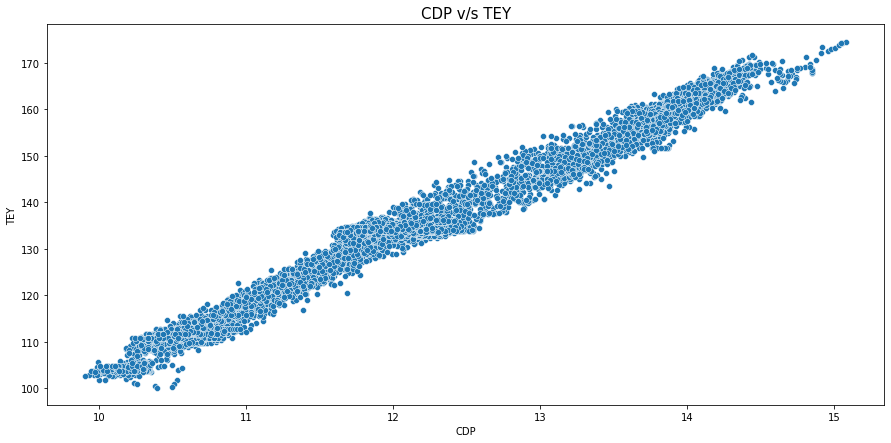

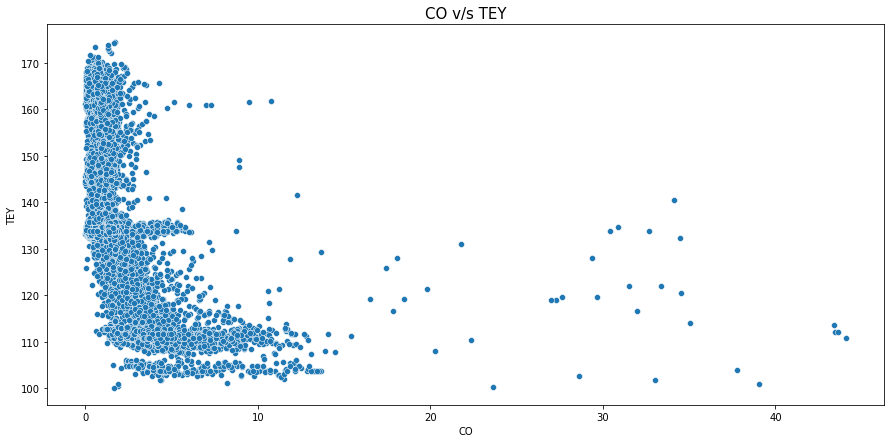

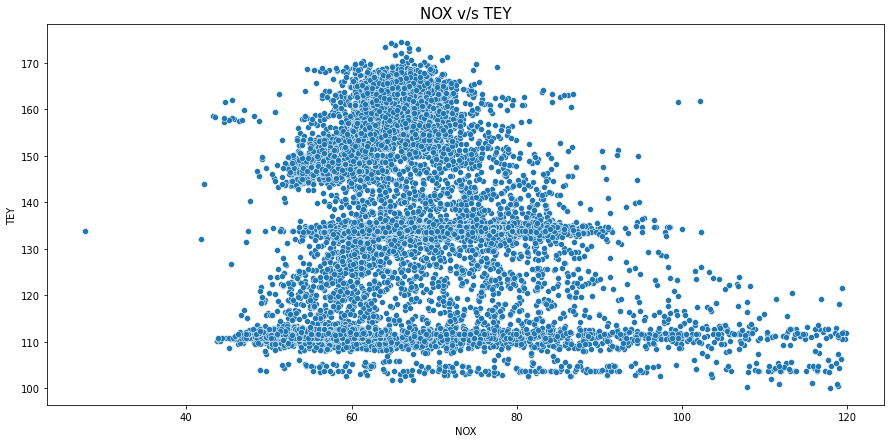

In [8]:
names = gas.drop(['TEY'], axis=1).columns
print("Indiviadual Comparison \n\n")
for i in names:
    plt.figure(figsize=(15,7))
    sns.scatterplot(data=gas, x=i, y="TEY")
    plt.title(label=f'{i} v/s TEY', size=15)
    plt.show()

# Scaling the data

In [9]:
scaler = MinMaxScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(gas),columns=gas.columns, index=gas.index)
scaled_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


# Creating dependent and independent variables

In [10]:
x=scaled_data.drop(['TEY'], axis=1)
y=scaled_data["TEY"]

# Splitting the data into training and testing

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Creating the model

In [12]:
model = Sequential()
model.add(Dense(16, input_dim=10, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='linear'))

In [13]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________


* We created a sequential model with 2 hidden layers, having 16 and 12 nodes respectively, and 1 output layer.
* Input dimension = 10 ; As we have 10 features in the dataset.
* The output layer has only one node, as we are dealing with regression and we only need to predict one variable.
* We are using 'RELU' as the Activation Function in the hidden layer, and at the final layer we used 'linear' Activation Function.
* The model will be compiled on 'adam' optimizer as 'MSE' as its evaluating metrics.

# Model Fitting

In [15]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 27, epochs = 100, verbose=0)
# epochs=50 ; which means the data will be passed in the neural network for 50 times.
# batch_size = 27 ; which means that everytime the data will be passed in the batches of 27 data points. 

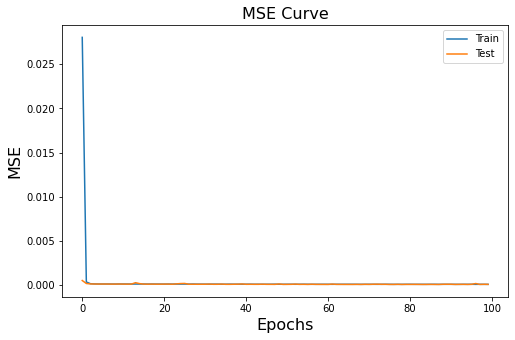

In [16]:
# Visualizing the training and testing loss at epochs=100
plt.figure(figsize=[8,5])
plt.plot(history.history['mse'], label='Train')
plt.plot(history.history['val_mse'], label='Test')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.title('MSE Curve', fontsize=16)
plt.show()

In [17]:
# making predictions
y_pred = model.predict(x_test)

141/141 [==============================] - 0s 1ms/step


# Model Evaluation

In [18]:
print("Training loss : ",model.evaluate(x_train, y_train,verbose=0)[0])
print("Testing loss : ",model.evaluate(x_test, y_test,verbose=0)[0])

Training loss :  6.977889279369265e-05
Testing loss :  6.92580797476694e-05


In [19]:
print("MSE : ",mean_squared_error(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("Adj R2 : ", 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-x.shape[1]-1))

MSE :  6.92580792931779e-05
R2 :  0.998479084518383
Adj R2 :  0.998478072463897


# Visualizing the actual v/s predicted values for all data points

<function matplotlib.pyplot.show(close=None, block=None)>

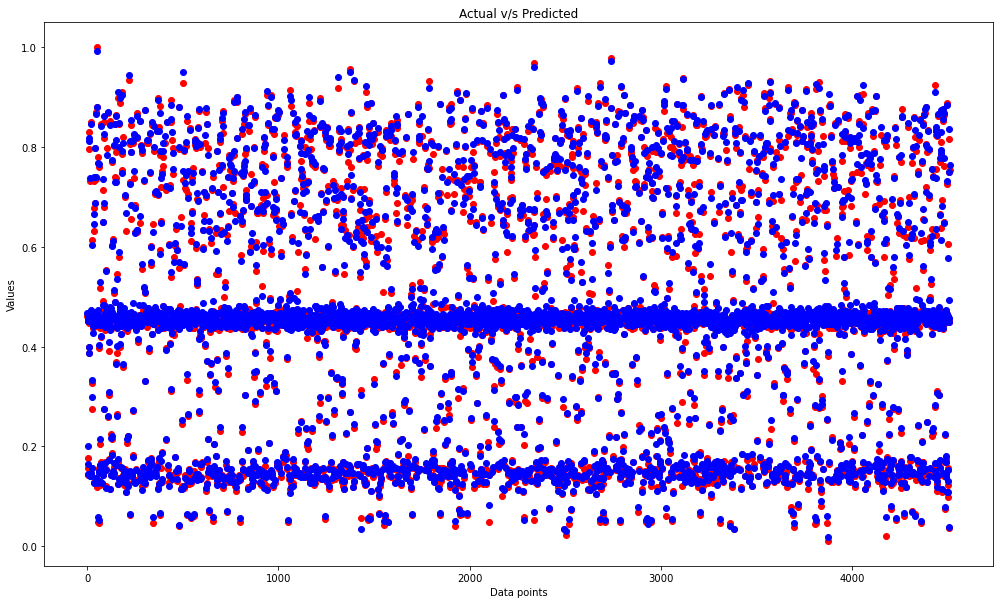

In [20]:
plt.figure(figsize=(17,10))
plt.scatter(range(len(y_test)), y_test, color="red", label="actual")
plt.scatter(range(len(y_pred)), y_pred, color="blue", label="predicted")
plt.xlabel("Data points")
plt.ylabel("Values")
plt.title("Actual v/s Predicted")
plt.show